In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Silver_HistoricalData_1669917710205.csv')

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/30/2022,21.781,62564.0,21.415,22.410,21.355
1,11/29/2022,21.436,45726.0,21.130,21.635,21.060
2,11/28/2022,21.125,57501.0,21.640,21.815,21.045
3,11/25/2022,21.609,30139.0,21.785,21.880,21.355
4,11/23/2022,21.526,20315.0,21.260,21.780,21.095


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1250 non-null   float64
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [5]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,1259.000000,1250.00000,1259.000000,1259.000000,1259.000000
mean,19.806008,62633.14320,19.820060,20.047642,19.558702
std,4.329010,37798.69542,4.339982,4.426561,4.227206
min,11.772000,1.00000,11.975000,12.330000,11.640000
25%,16.133000,42252.75000,16.140000,16.257500,15.992500
50%,18.168000,60558.50000,18.160000,18.400000,17.975000
75%,23.998000,77649.75000,24.020000,24.305000,23.617500
max,29.418000,347002.00000,29.235000,30.350000,28.300000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

Text(0.5, 1.0, 'Price per day from 01-12-2017 for Silver in $')

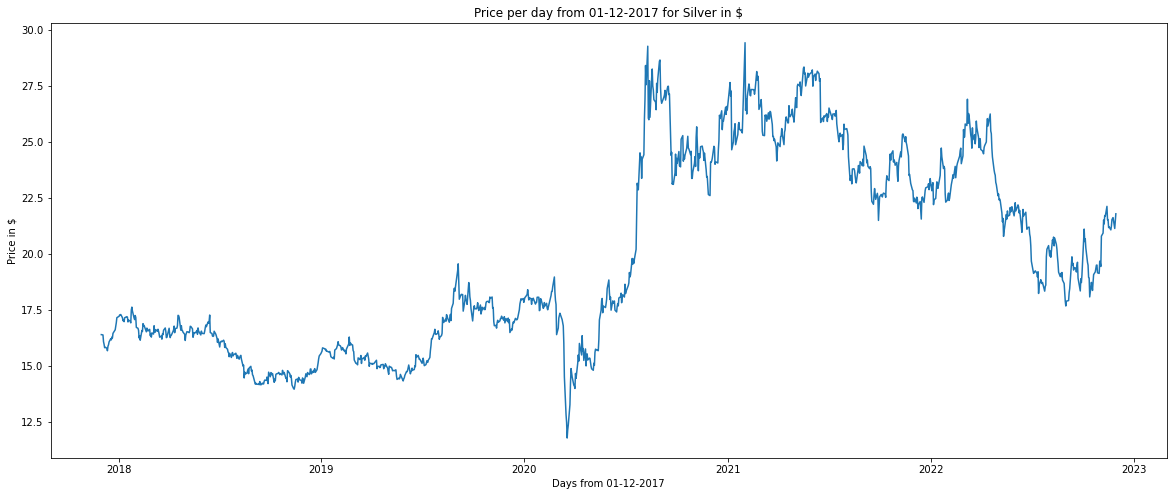

In [7]:
plt.figure(figsize=(20,8))
#plt.plot(df['Close/Last'])
plt.plot(df['Date'],df['Close/Last'])
plt.ylabel('Price in $')
plt.xlabel('Days from 01-12-2017')
plt.title('Price per day from 01-12-2017 for Silver in $')

In [55]:
df = df.sort_values('Date')
df

,Date,Close/Last,Volume,Open,High,Low
1258,2017-12-01,16.388,96685.0,16.455,16.585,16.265
1257,2017-12-04,16.373,68045.0,16.370,16.455,16.265
1256,2017-12-05,16.068,80978.0,16.340,16.380,16.040
1255,2017-12-06,15.955,66811.0,16.135,16.170,15.935
1254,2017-12-07,15.802,72437.0,15.970,16.005,15.660
...,...,...,...,...,...,...
4,2022-11-23,21.526,20315.0,21.260,21.780,21.095
3,2022-11-25,21.609,30139.0,21.785,21.880,21.355
2,2022-11-28,21.125,57501.0,21.640,21.815,21.045
1,2022-11-29,21.436,45726.0,21.130,21.635,21.060


In [56]:
close_data = df['Close/Last'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

#close_train = close_data[::-1]
close_train = close_data[:split]
#close_test = close_data[::-1]
close_test = close_data[split:]

#date_train = date_train[::-1]
date_train = df['Date'][0:split]
#date_test = date_test[::-1]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

1007
252


In [57]:
date_test[0:2]

251   2021-12-01
250   2021-12-02
Name: Date, dtype: datetime64[ns]

Text(0.5, 0, 'Days from 01-12-2017')

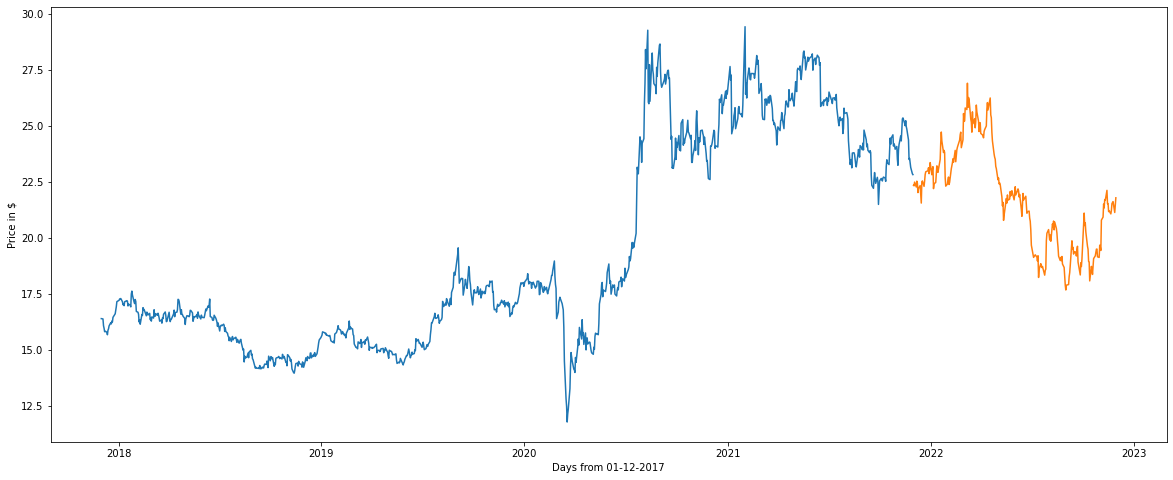

In [59]:
plt.figure(figsize=(20,8))
#plt.plot(df['Close/Last'])
plt.plot(date_train, close_train)
plt.plot(date_test, close_test)
plt.ylabel('Price in $')
plt.xlabel('Days from 01-12-2017')
#plt.title('Price per day from 01-12-2017 for Silver in $')

In [60]:
look_back = 10

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [62]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [63]:
model.fit(train_generator, epochs=100, verbose=1)

Epoch 1/100
50/50 [==============================] - 3s 9ms/step - loss: 206.6924
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 75.6918
Epoch 3/100
50/50 [==============================] - 0s 7ms/step - loss: 48.7606
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 34.3292
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 27.2742
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 23.7941
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 22.2853
Epoch 8/100
50/50 [==============================] - 0s 7ms/step - loss: 21.6785
Epoch 9/100
50/50 [==============================] - 0s 7ms/step - loss: 21.3139
Epoch 10/100
50/50 [==============================] - 0s 7ms/step - loss: 21.2495
Epoch 11/100
50/50 [==============================] - 0s 7ms/step - loss: 21.1596
Epoch 12/100
50/50 [==============================] - 0s 7ms/step - loss: 21.1473
Epoch 13/100
50/50 [====

In [64]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = " Price per day from 01-12-2017 for Silver in $ ",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

C:\Users\rutwi\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [65]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 10
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [68]:
forecast, forecast_dates

(array([21.781     , 21.90494537, 22.18037415, 22.42512131, 22.63892174,
        22.81572342, 22.94604111, 23.03487396, 23.08750153, 23.12467194,
        23.14955139]),
 [Timestamp('2022-11-30 00:00:00', freq='D'),
  Timestamp('2022-12-01 00:00:00', freq='D'),
  Timestamp('2022-12-02 00:00:00', freq='D'),
  Timestamp('2022-12-03 00:00:00', freq='D'),
  Timestamp('2022-12-04 00:00:00', freq='D'),
  Timestamp('2022-12-05 00:00:00', freq='D'),
  Timestamp('2022-12-06 00:00:00', freq='D'),
  Timestamp('2022-12-07 00:00:00', freq='D'),
  Timestamp('2022-12-08 00:00:00', freq='D'),
  Timestamp('2022-12-09 00:00:00', freq='D'),
  Timestamp('2022-12-10 00:00:00', freq='D')])

In [79]:
df_1 = pd.DataFrame(forecast, columns = ['Forecast'])
df_1['Forecast_dates'] = forecast_dates
df_1

,Forecast,Forecast_dates
0,21.781000,2022-11-30
1,21.904945,2022-12-01
2,22.180374,2022-12-02
3,22.425121,2022-12-03
4,22.638922,2022-12-04
5,22.815723,2022-12-05
6,22.946041,2022-12-06
7,23.034874,2022-12-07
8,23.087502,2022-12-08
9,23.124672,2022-12-09


In [74]:
trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
trace4 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode='lines',
    name = 'Forecast'
)
layout = go.Layout(
    title = " Price per day from 01-12-2017 for Silver in $ ",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"},
    width=1500,
    height=700,
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

,Forecast,Forecast_dates
0,21.781000,2022-11-30
1,21.904945,2022-12-01
2,22.180374,2022-12-02
3,22.425121,2022-12-03
4,22.638922,2022-12-04
5,22.815723,2022-12-05
6,22.946041,2022-12-06
7,23.034874,2022-12-07
8,23.087502,2022-12-08
9,23.124672,2022-12-09
